# Insurances

This notebook is about the capital of insurances. 

I want to use pandas for data cleaning and describing and matplotlib as well as seaborn for visualisation. 

In [1]:
# Import the necessary libraries. All are part of the environment, in which the notebook lives. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data and get first glimpse 

insurances=pd.read_csv('PT6_21072021205145247.csv')
insurances.head()

,CUR,Currency,VAR,Variable,OWN,Ownership,IVTYP,Investment Type,ITYP,Insurance Type,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),REST,Land and buildings,LIFE,Life,...,2001,EUR,Euro,6,Millions,NaN,NaN,10703.307,NaN,NaN
1,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),REST,Land and buildings,LIFE,Life,...,2002,EUR,Euro,6,Millions,NaN,NaN,9177.693,NaN,NaN
2,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),REST,Land and buildings,LIFE,Life,...,2003,EUR,Euro,6,Millions,NaN,NaN,9049.629,NaN,NaN
3,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),REST,Land and buildings,LIFE,Life,...,2004,EUR,Euro,6,Millions,NaN,NaN,10025.028,NaN,NaN
4,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,TOT,All undertakings (=1+3),REST,Land and buildings,LIFE,Life,...,2005,EUR,Euro,6,Millions,NaN,NaN,11638.488,NaN,NaN


In [3]:
insurances.columns

Index(['CUR', 'Currency', 'VAR', 'Variable', 'OWN', 'Ownership', 'IVTYP',
       'Investment Type', 'ITYP', 'Insurance Type', 'DEST', 'Destination',
       'TYP', 'Insurer type', 'COU', 'Country', 'YEA', 'Year', 'Unit Code',
       'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')

In [4]:
insurances.describe()

,YEA,Year,PowerCode Code,Reference Period Code,Reference Period,Value
count,276615.000000,276615.000000,276615.0,0.0,0.0,2.741760e+05
mean,2013.424413,2013.424413,6.0,NaN,NaN,8.109024e+05
std,4.961445,4.961445,0.0,NaN,NaN,1.627506e+07
min,2001.000000,2001.000000,6.0,NaN,NaN,-1.030099e+05
25%,2010.000000,2010.000000,6.0,NaN,NaN,4.000000e+00
50%,2015.000000,2015.000000,6.0,NaN,NaN,3.865305e+02
75%,2017.000000,2017.000000,6.0,NaN,NaN,7.480068e+03
max,2019.000000,2019.000000,6.0,NaN,NaN,2.230522e+09


In [5]:
insurances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276615 entries, 0 to 276614
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CUR                    276615 non-null  object 
 1   Currency               276615 non-null  object 
 2   VAR                    276615 non-null  object 
 3   Variable               276615 non-null  object 
 4   OWN                    276615 non-null  object 
 5   Ownership              276615 non-null  object 
 6   IVTYP                  276615 non-null  object 
 7   Investment Type        276615 non-null  object 
 8   ITYP                   276615 non-null  object 
 9   Insurance Type         276615 non-null  object 
 10  DEST                   276615 non-null  object 
 11  Destination            276615 non-null  object 
 12  TYP                    276615 non-null  object 
 13  Insurer type           276615 non-null  object 
 14  COU                    276615 non-nu

In [6]:
print(insurances['Flags'].unique())
print(insurances['PowerCode'].unique())
print(insurances['Ownership'].unique())
print(insurances['TYP'].unique())
print(insurances['Destination'].unique())

[nan 'Non-publishable and confidential value' 'Break']
['Millions']
['All undertakings (=1+3)' '1. Domestic undertakings'
 '2. Foreign controlled undertakings'
 '3. Branches and agencies of foreign undertakings']
['DIR']
['Domestic' 'Foreign' 'Total']


In [7]:
grouped_german=insurances[insurances['Country']=='Germany'].groupby(['Year', 'Investment Type', 'Destination', 'Insurance Type'], as_index=False).sum()

In [8]:
grouped_german.head()

,Year,Investment Type,Destination,Insurance Type,YEA,PowerCode Code,Reference Period Code,Reference Period,Value
0,2001,Bills and bonds issued by public and private s...,Total,Life,6003,18,0.0,0.0,212599.602
1,2001,Bills and bonds issued by public and private s...,Total,Non-Life,6003,18,0.0,0.0,49324.975
2,2001,Bills and bonds issued by public and private s...,Total,Total,6003,18,0.0,0.0,261924.576
3,2001,Equity,Total,Life,6003,18,0.0,0.0,113050.687
4,2001,Equity,Total,Non-Life,6003,18,0.0,0.0,72585.710


In [9]:
grouped_german.index
grouped_german.columns
grouped_german['Destination'].unique()

array(['Total'], dtype=object)

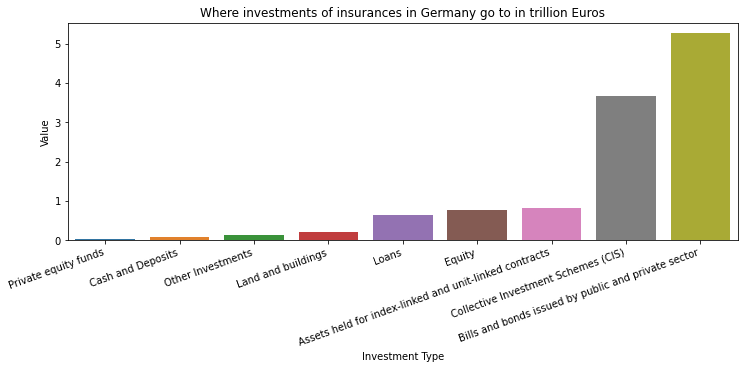

In [10]:
investment_year=grouped_german['Year']==2018
investment_type=grouped_german['Investment Type']!='TOTAL INVESTMENTS'
destination=grouped_german['Destination']=='Total'
insurance_type=grouped_german['Insurance Type']=='Total'
of_which=grouped_german['Investment Type'].str.contains("of which")
total_subset=grouped_german[investment_year & destination & investment_type & ~of_which & insurance_type]

chart_data = total_subset.sort_values(['Value']).reset_index(drop=True)
chart_data['Value']=chart_data['Value'].round(0)/1000000

plt.figure(figsize=(12,4))
ax=sns.barplot(x='Investment Type', y='Value', data=chart_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_title('Where investments of insurances in Germany go to in trillion Euros')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The majority of assets held by German insurances in 2018 were bills and bonds as well as collective investment schemes. Those schemes are defined on OECD's website as:

"Comprise both retail and institutional funds (open-end and closed end) in which investors pool their funds to invest in a diversified portfolio of securities. It includes mutual funds, investment funds, UCITS-like funds, exchange-traded funds (ETFs), and specialised funds such as real estate funds (e.g. REITs), money market funds, debt funds. CIS funds may be listed or unlisted. Hedge funds and private equity funds should not be included in this category."

Different than for other countries, no distinction between foreign and domestic investments is available. 

In [11]:
total=grouped_german[investment_year & destination & investment_type & ~of_which]
total1=total.groupby(['Insurance Type', 'Year'], as_index=False).sum()

total1[total1['Insurance Type']!='Total']

,Insurance Type,Year,YEA,PowerCode Code,Reference Period Code,Reference Period,Value
0,Life,2018,163458,486,0.0,0.0,7913572.037
1,Non-Life,2018,163458,486,0.0,0.0,3686999.928


In [12]:
total2=total.groupby(['Insurance Type', 'Year', 'Investment Type'], as_index=False).sum()

total2=total[total['Insurance Type']!='Total']
total2

,Year,Investment Type,Destination,Insurance Type,YEA,PowerCode Code,Reference Period Code,Reference Period,Value
375,2018,Assets held for index-linked and unit-linked c...,Total,Life,18162,54,0.0,0.0,815509.382
376,2018,Assets held for index-linked and unit-linked c...,Total,Non-Life,18162,54,0.0,0.0,282.988
378,2018,Bills and bonds issued by public and private s...,Total,Life,18162,54,0.0,0.0,3401891.275
379,2018,Bills and bonds issued by public and private s...,Total,Non-Life,18162,54,0.0,0.0,1861860.284
381,2018,Cash and Deposits,Total,Life,18162,54,0.0,0.0,33537.903
382,2018,Cash and Deposits,Total,Non-Life,18162,54,0.0,0.0,50992.652
384,2018,Collective Investment Schemes (CIS),Total,Life,18162,54,0.0,0.0,2569722.167
385,2018,Collective Investment Schemes (CIS),Total,Non-Life,18162,54,0.0,0.0,1102186.699
387,2018,Equity,Total,Life,18162,54,0.0,0.0,322137.664
388,2018,Equity,Total,Non-Life,18162,54,0.0,0.0,457788.559


In [13]:
total2.groupby(['Insurance Type', 'Investment Type'], as_index=True).sum()['Value']

Insurance Type  Investment Type                                       
Life            Assets held for index-linked and unit-linked contracts     815509.382
                Bills and bonds issued by public and private sector       3401891.275
                Cash and Deposits                                           33537.903
                Collective Investment Schemes (CIS)                       2569722.167
                Equity                                                     322137.664
                Land and buildings                                         130854.581
                Loans                                                      528318.959
                Other Investments                                           95416.344
                Private equity funds                                        16183.762
Non-Life        Assets held for index-linked and unit-linked contracts        282.988
                Bills and bonds issued by public and private sector  

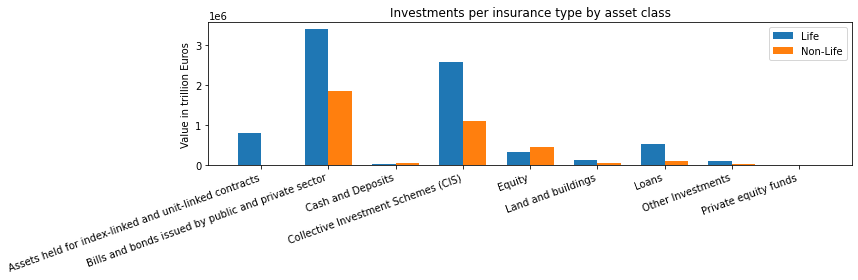

In [14]:
life_insurances = total2[total2['Insurance Type']=='Life'].groupby('Investment Type', as_index=False).sum()['Value']
non_life_insurances = total2[total2['Insurance Type']=='Non-Life'].groupby('Investment Type', as_index=False).sum()['Value']
labels=total2[total2['Insurance Type']=='Life']['Investment Type']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,4))
rect1=ax.bar(x-width/2, life_insurances, width, label='Life')
rect2=ax.bar(x+width/2, non_life_insurances, width, label='Non-Life')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value in trillion Euros')
ax.set_title('Investments per insurance type by asset class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")

fig.tight_layout()


## Timeline of development 

In [108]:
germany_total=insurances[(insurances['Country']=='Germany') & (insurances['Insurance Type']=='Total') & ~(insurances['Investment Type'].str.contains("of which"))]
germany_total.head()

,CUR,Currency,VAR,Variable,OWN,Ownership,IVTYP,Investment Type,ITYP,Insurance Type,...,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
5911,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,DOM,1. Domestic undertakings,REST,Land and buildings,TOT,Total,...,2006,EUR,Euro,6,Millions,NaN,NaN,18410.771,NaN,NaN
5912,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,DOM,1. Domestic undertakings,REST,Land and buildings,TOT,Total,...,2007,EUR,Euro,6,Millions,NaN,NaN,16018.548,NaN,NaN
5913,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,DOM,1. Domestic undertakings,REST,Land and buildings,TOT,Total,...,2008,EUR,Euro,6,Millions,NaN,NaN,15211.000,NaN,NaN
5914,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,DOM,1. Domestic undertakings,REST,Land and buildings,TOT,Total,...,2009,EUR,Euro,6,Millions,NaN,NaN,14401.456,NaN,NaN
5915,EUR,Euros (millions),OFI,Outstanding figures of investments by direct i...,DOM,1. Domestic undertakings,REST,Land and buildings,TOT,Total,...,2010,EUR,Euro,6,Millions,NaN,NaN,15518.183,NaN,NaN


In [109]:
germany_per_year_type=germany_total.groupby(['Investment Type', 'Year'], as_index=False).sum('Value')
germany_per_year_type.tail()

,Investment Type,Year,YEA,PowerCode Code,Reference Period Code,Reference Period,Value
126,TOTAL INVESTMENTS,2015,18135,54,0.0,0.0,9.621879e+06
127,TOTAL INVESTMENTS,2016,18144,54,0.0,0.0,1.091656e+07
128,TOTAL INVESTMENTS,2017,18153,54,0.0,0.0,1.162102e+07
129,TOTAL INVESTMENTS,2018,18162,54,0.0,0.0,1.160057e+07
130,TOTAL INVESTMENTS,2019,18171,54,0.0,0.0,1.284745e+07


In [110]:
germany_per_year_type_wototal=germany_per_year_type[germany_per_year_type['Investment Type']!='TOTAL INVESTMENTS']

In [111]:
#germany_per_year_type_wototal['Year'].head()
#germany_per_year_type_wototal['Year as Date']=pd.to_datetime(germany_per_year_type_wototal['Year'], format='%Y')

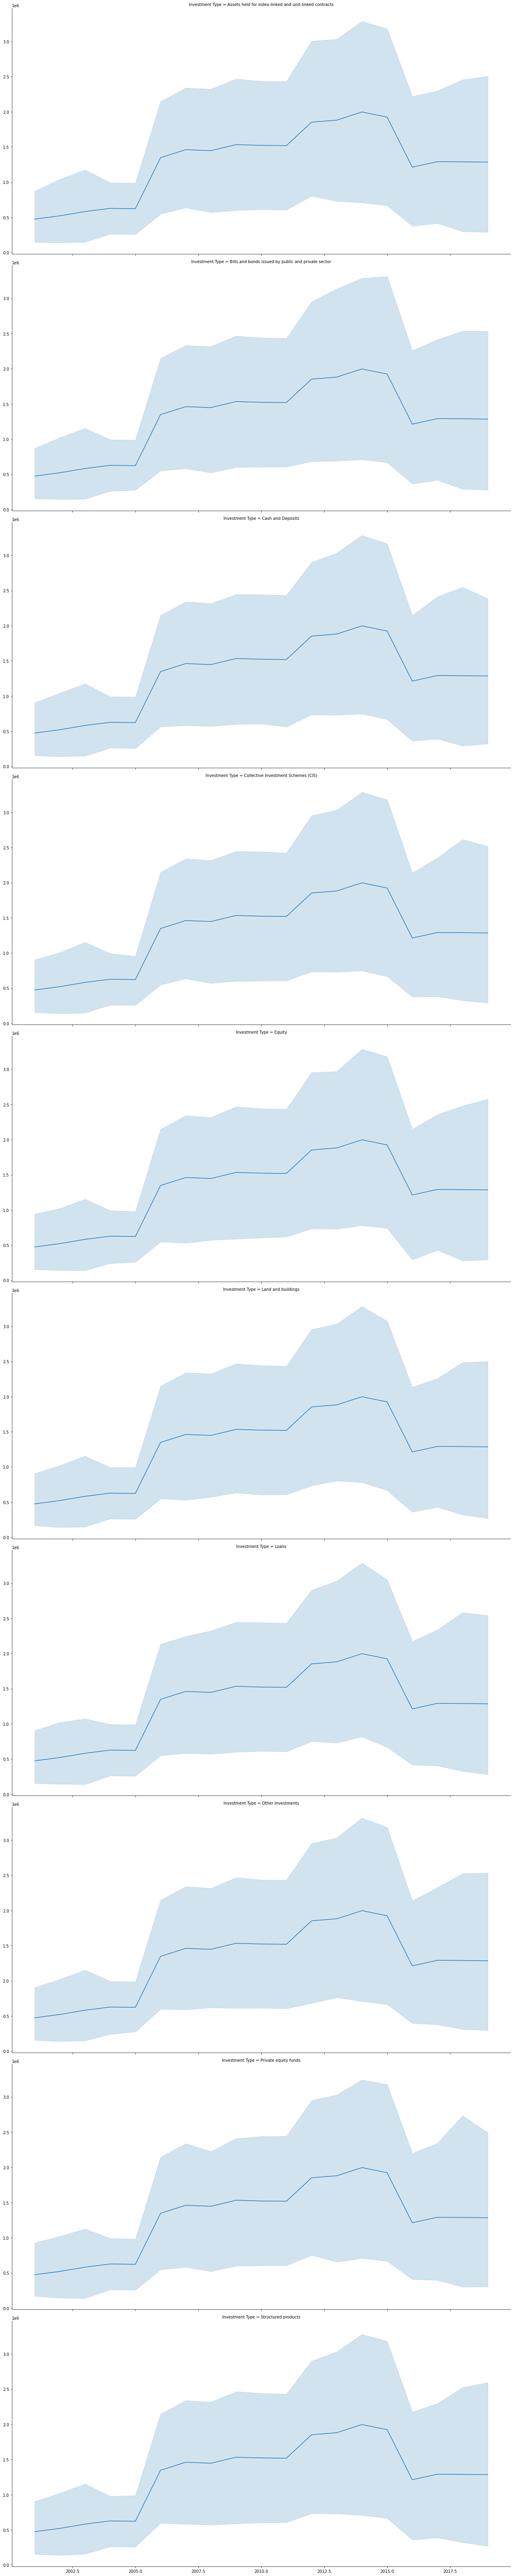

In [112]:
g=sns.FacetGrid(data=germany_per_year_type_wototal, row='Investment Type', height=9, aspect=2)
g.map(sns.lineplot, x='Year', y='Value', data=germany_per_year_type_wototal)

In [113]:
germany_per_year_type_wototal[germany_per_year_type_wototal['Investment Type']=='Assets held for index-linked and unit-linked contracts']

,Investment Type,Year,YEA,PowerCode Code,Reference Period Code,Reference Period,Value
0,Assets held for index-linked and unit-linked c...,2016,18144,54,0.0,0.0,773379.328
1,Assets held for index-linked and unit-linked c...,2017,18153,54,0.0,0.0,888994.930
2,Assets held for index-linked and unit-linked c...,2018,18162,54,0.0,0.0,815792.368
3,Assets held for index-linked and unit-linked c...,2019,18171,54,0.0,0.0,993029.308


In [118]:
pd.to_numeric(germany_per_year_type_wototal['Value'])

0      773379.328
1      888994.930
2      815792.368
3      993029.308
4      261924.576
          ...    
107     30768.529
108     26115.181
109     29322.659
110     46447.175
111    116366.984
Name: Value, Length: 112, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Value'>

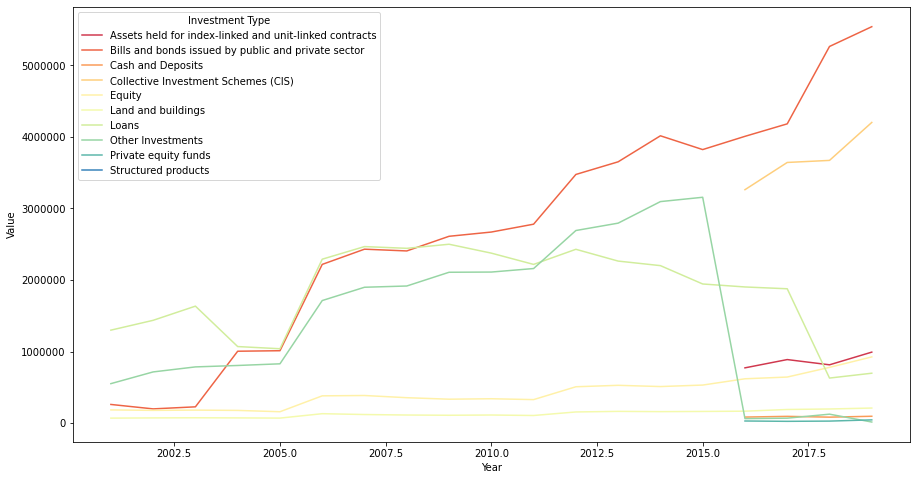

In [121]:
plt.figure(figsize = (15,8))
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(data=germany_per_year_type_wototal, x='Year', y='Value', hue='Investment Type', palette='Spectral')